**Matplotlib Box Plots**

In [2]:

# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\App\envs\pythoncourse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Example 1**

Create a box plot to see the distribution of salary_year_avg for the DataFrame.

In [3]:
# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

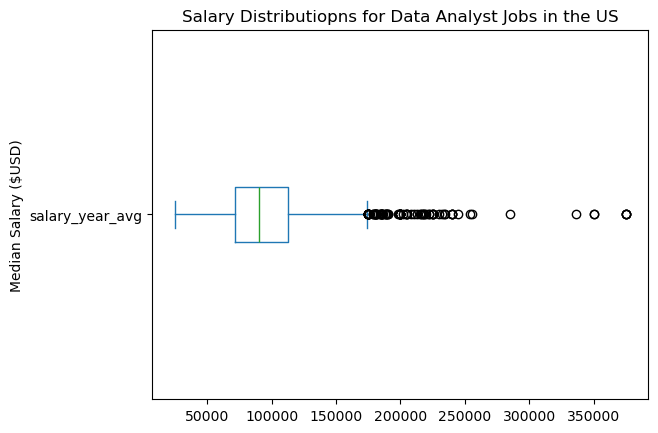

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributiopns for Data Analyst Jobs in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

*****Interpretation*****

**Median Salary**: The green line in the box indicates the median salary, which appears to be around $100,000.

**Interquartile Range (IQR)**: The box itself spans from approximately 65,000(lowquartile) to 125,000 (upper quartile). This range represents the middle 50% of the salary data.

**Whiskers**: The lines extending from the box (whiskers) suggest the range of typical salaries beyond the IQR. The lower whisker extends to about 50,000 indicating the minimum typical salary. The upper whisker goes up to about 175,000, suggesting the maximum typical salary before considering outliers.

**Outliers**: Salaries represented by dots above the upper whisker are considered outliers. There are several outliers ranging up to approximately $350,000, indicating salaries that are unusually high compared to the general distribution.

**Example 2**

We'll create 3 boxplots for Data Analyst, Data Engineer, and Data Scientist job salaries in the United States.

First let's create a DataFrame with only these 3 job_titles and only salary data.

C:\Users\User\AppData\Local\Temp\ipykernel_2520\1573480775.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


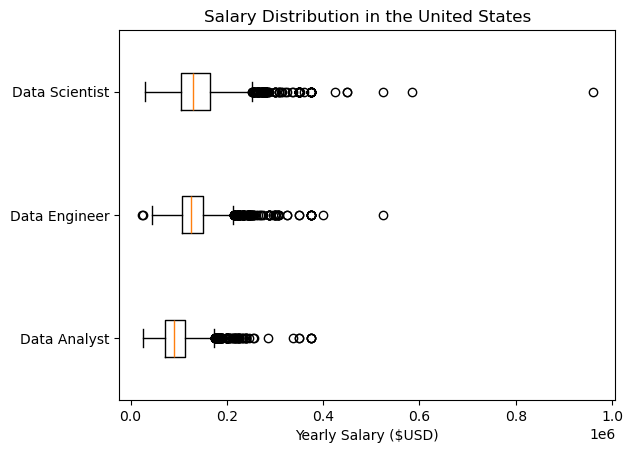

In [9]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

**Customization**

C:\Users\User\AppData\Local\Temp\ipykernel_2520\2141833509.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


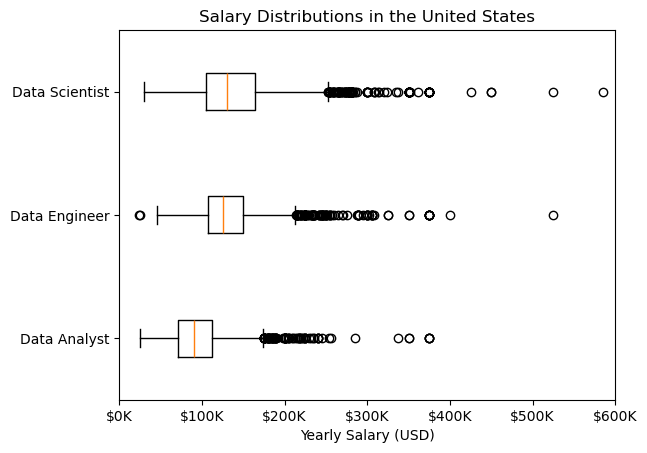

In [10]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 

# Format x-axis to show 'Thousands'
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()